In [84]:
from jax import (
    random, grad, jit,
    tree_map, tree_leaves,
    numpy as jnp
    )
from jax.typing import ArrayLike
from sklearn.datasets import make_moons
from typing import Dict, Callable, List
import matplotlib.pyplot as plt

<ipython-input-84-b931fe94698a>:1: DeprecationWarning: jax.tree_leaves is deprecated: use jax.tree_util.tree_leaves.
  from jax import (


In [2]:
x = list(range(100))
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [5]:
y = list(map(lambda i: i ** 2, x))

In [6]:
y

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

In [8]:
x = {
    "num": 1,
    "vals": [1, 2, 3]
}

In [12]:
y = list(map(lambda i: print(i), x.values()))

1
[1, 2, 3]


In [13]:
tree_map(lambda i: i ** 2, x)

{'num': 1, 'vals': [1, 4, 9]}

In [14]:
key = random.PRNGKey(0)
key_w, key_b = random.split(key)

In [15]:
params = {
    "w": random.normal(key_w, shape=(2, 5)),
    "b": random.normal(key_b, shape=(1, 5))
}

In [16]:
tree_map(lambda i: i.shape, params)

{'b': (1, 5), 'w': (2, 5)}

In [17]:
params = {
    "layer1": {
        "w": random.normal(key_w, shape=(2, 5)), # 10
        "b": random.normal(key_b, shape=(1, 5)) # 5
    },
    "layer2": {
        "w": random.normal(key_w, shape=(5, 5)), # 25
        "b": random.normal(key_b, shape=(1, 5)) # 5
    },
    "layer3": {
        "w": random.normal(key_w, shape=(5, 1)), # 5
        "b": random.normal(key_b, shape=(1, 1)) # 1
    }
}

In [19]:
tree_map(lambda i: i.shape, params)

{'layer1': {'b': (1, 5), 'w': (2, 5)},
 'layer2': {'b': (1, 5), 'w': (5, 5)},
 'layer3': {'b': (1, 1), 'w': (5, 1)}}

In [24]:
tree_leaves(params)

[Array([[-1.4581939, -2.047044 ,  2.0473392,  1.1684095, -0.9758364]],      dtype=float32),
 Array([[-2.6105583 ,  0.03385283,  1.0863333 , -1.480299  ,  0.48895672],
        [ 1.062516  ,  0.54174834,  0.0170228 ,  0.2722685 ,  0.30522448]],      dtype=float32),
 Array([[-1.4581939, -2.047044 ,  2.0473392,  1.1684095, -0.9758364]],      dtype=float32),
 Array([[-1.4328747 , -3.0475688 , -1.7723083 , -0.39982578, -0.08705459],
        [ 0.24356805,  1.1594162 ,  2.0131483 , -0.51713794, -0.4314174 ],
        [ 1.1762875 ,  0.12003808,  1.4100976 , -0.44235876,  0.24825189],
        [ 0.4281292 ,  1.8193713 , -1.1292284 , -1.4301499 , -1.4492745 ],
        [ 0.16182707, -0.22740453, -0.52637786, -0.10463028, -0.898667  ]],      dtype=float32),
 Array([[-1.2515389]], dtype=float32),
 Array([[0.59902626],
        [0.2172144 ],
        [2.4202902 ],
        [0.03266738],
        [1.2164948 ]], dtype=float32)]

In [25]:
list(map(lambda i: i.size, tree_leaves(params)))

[5, 10, 5, 25, 1, 5]

In [26]:
sum(map(lambda i: i.size, tree_leaves(params)))

51

In [27]:
x = {
    "a": [1, 2, 3],
    "b": [2, 3, 4]
}

In [28]:
y = {
    "a": [-1, -2, -3],
    "b": [-2, -3, -4]
}

In [30]:
tree_map((lambda l_a, l_b: l_a + l_b), x, y)

{'a': [0, 0, 0], 'b': [0, 0, 0]}

In [32]:
key = random.PRNGKey(0)
key_x, key_noise = random.split(key, 2)

In [33]:
x = random.uniform(key_x, shape=(1000, 1))
y = 2 * x - 1 + random.normal(key_noise, shape=(1000, 1)) * 0.1

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

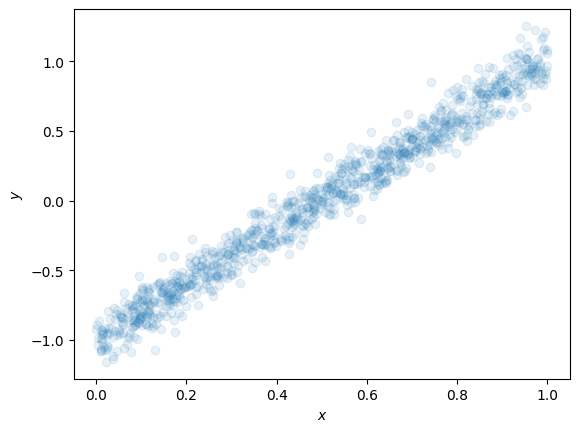

In [35]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.1)
ax.set(xlabel="$x$", ylabel="$y$")

In [40]:
Params = Dict[str, ArrayLike]

In [41]:
# {"w": ..., "b": ...}
def predict(x: ArrayLike, params: Params) -> ArrayLike:
    return x @ params["w"] + params["b"]

In [42]:
def loss(x: ArrayLike, y: ArrayLike) -> Callable:
    @jit
    def loss_f(params: Params) -> ArrayLike:
        y_pred = predict(x, params)
        loss_value = ((y - y_pred) ** 2).mean()
        return loss_value
    return loss_f

In [49]:
loss_fn = loss(x, y)

In [50]:
params = {
    "w": jnp.array([[0.]]),
    "b": jnp.array([[0.]])
}

In [51]:
tree_map(lambda i: i.shape, params)

{'b': (1, 1), 'w': (1, 1)}

In [52]:
loss_fn(params)

Array(0.34253657, dtype=float32)

In [54]:
grad_fn = jit(grad(loss_fn))

In [55]:
grad_fn(params)

{'b': Array([[0.01220242]], dtype=float32),
 'w': Array([[-0.32497638]], dtype=float32)}

In [62]:
N_ITERS = 500
LR = 0.1

In [63]:
for i in range(N_ITERS):
    grads = grad_fn(params)
    params = tree_map((lambda w, g: w - LR * g), params, grads)

In [64]:
params

{'b': Array([[-0.99732995]], dtype=float32),
 'w': Array([[2.007046]], dtype=float32)}

In [65]:
x_pred = jnp.linspace(0, 1, 10).reshape(-1, 1)

In [66]:
y_pred = predict(x_pred, params)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

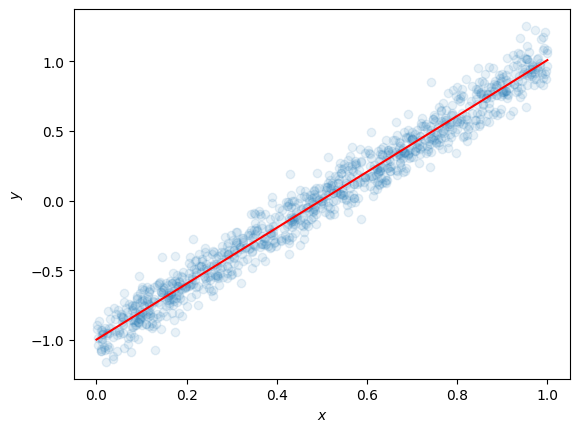

In [67]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.1)
ax.plot(x_pred, y_pred, color="r")
ax.set(xlabel="$x$", ylabel="$y$")

In [68]:
key = random.PRNGKey(0)
x = random.normal(key, shape=(5, 2))

In [69]:
x

Array([[-0.3721109 ,  0.26423115],
       [-0.18252768, -0.7368197 ],
       [-0.44030377, -0.1521442 ],
       [-0.67135346, -0.5908641 ],
       [ 0.73168886,  0.5673026 ]], dtype=float32)

In [72]:
b = jnp.array([1, 10]).reshape(1, -1)

In [73]:
b

Array([[ 1, 10]], dtype=int32)

In [74]:
b.shape

(1, 2)

In [75]:
x + b

Array([[ 0.6278891 , 10.264231  ],
       [ 0.81747234,  9.263181  ],
       [ 0.5596962 ,  9.847856  ],
       [ 0.32864654,  9.409136  ],
       [ 1.7316889 , 10.567303  ]], dtype=float32)

In [77]:
n_units = [2, 8, 4, 1]

In [78]:
Params = Dict[str, Dict[str, ArrayLike]]
# {"layer1": {"w": ..., "b": ...}, "layer2": {"w": ..., "b": ...}, ...}
def init_params(seed: int, n_units: List[int]) -> Params:
    params = {}
    n_layers = len(n_units) - 1
    key = random.PRNGKey(seed)
    keys = random.split(key, n_layers)
    for layer in range(n_layers):
        key_layer = keys[layer]
        layer_shape = (n_units[layer], n_units[layer + 1])
        params_layer = {
            "w": random.normal(key_layer, shape=layer_shape),
            "b": jnp.zeros(shape=(1, n_units[layer + 1]))
        }
        params[f"layer_{layer}"] = params_layer
    return params

In [157]:
n_units = [2, 256, 64, 32, 1]
params = init_params(1, n_units)

In [158]:
params

{'layer_0': {'w': Array([[-6.53275847e-01, -8.25763270e-02, -1.21604240e+00,
           9.10008609e-01, -1.37947464e+00, -3.48969042e-01,
           8.42113435e-01,  7.00993896e-01,  1.52224672e+00,
           6.48857415e-01, -6.77752018e-01, -4.43894565e-01,
          -1.53059304e-01,  1.02016532e+00, -2.37015784e-01,
          -4.15648580e-01,  4.53810185e-01,  8.13794196e-01,
          -7.84593895e-02, -6.55376375e-01, -1.91127825e+00,
           2.28073224e-01, -5.46725512e-01, -6.16908073e-01,
          -5.70206702e-01,  3.22190762e-01,  1.67639267e+00,
          -1.33796692e-01,  8.04670632e-01,  8.48473787e-01,
           8.10817957e-01,  2.09617186e+00, -1.37942517e+00,
          -9.91282642e-01, -7.12347776e-02,  1.96922290e+00,
           1.67752996e-01,  4.45062995e-01,  1.83112025e+00,
          -9.64870572e-01,  3.81855667e-01, -8.05541128e-02,
          -3.59441549e-01,  3.00296515e-01, -1.10116951e-01,
          -8.10811371e-02, -1.86690557e+00,  1.20953393e+00,
        

In [159]:
tree_map(lambda i: i.shape, params)

{'layer_0': {'b': (1, 256), 'w': (2, 256)},
 'layer_1': {'b': (1, 64), 'w': (256, 64)},
 'layer_2': {'b': (1, 32), 'w': (64, 32)},
 'layer_3': {'b': (1, 1), 'w': (32, 1)}}

In [160]:
def sigmoid(x: ArrayLike) -> ArrayLike:
    return 1 / (1 + jnp.exp(x))

In [161]:
def predict(x: ArrayLike, params: Params) -> ArrayLike:
    n_layers = len(params)
    h = x
    for layer in range(n_layers):
        layer_params = params[f"layer_{layer}"]
        h = sigmoid(h @ layer_params["w"] + layer_params["b"])
    return h

In [162]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = jnp.array(X)
y = jnp.array(y).reshape(-1, 1)

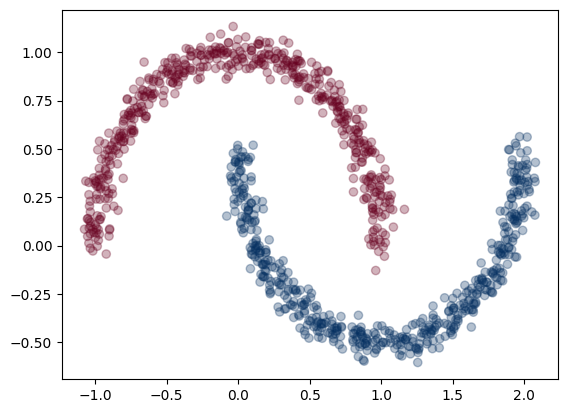

In [163]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3)

In [164]:
y_pred = predict(X, params)

In [165]:
y_pred.shape

(1000, 1)

In [166]:
def get_loss(X: ArrayLike, y: ArrayLike) -> Callable:
    @jit
    def loss(params: Params) -> ArrayLike:
        y_pred = predict(X, params)
        loss_val = - (
            y * jnp.log(y_pred) +
            (1 - y) * jnp.log(1 - y_pred)
        ).mean()
        return loss_val
    return loss

In [167]:
loss_fn = get_loss(X, y)
grad_fn = jit(grad(loss_fn))

In [168]:
N_ITERS = 10000
LR = 0.01

In [169]:
for i in range(N_ITERS):
    grads = grad_fn(params)
    params = tree_map((lambda w, g: w - LR * g), params, grads)

In [170]:
y_pred = predict(X, params)

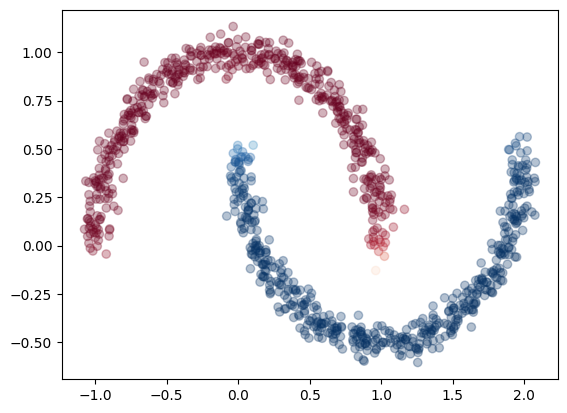

In [171]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="RdBu", alpha=0.3)

In [173]:
x1 = jnp.linspace(-1.1, 2.1, 100)
x2 = jnp.linspace(-0.6, 1.1, 100)
X1, X2 = jnp.meshgrid(x1, x2)
X_grid = jnp.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
y_pred = predict(X_grid, params)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

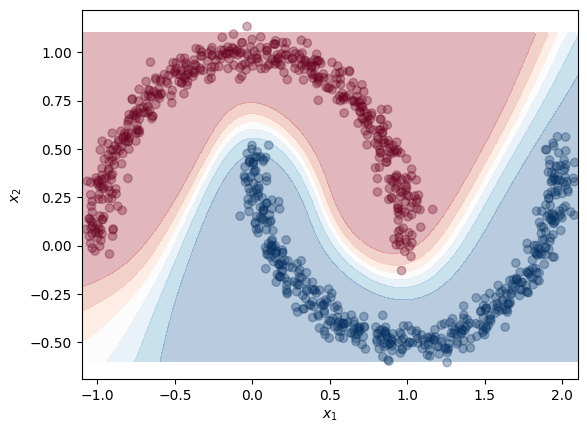

In [176]:
fig, ax = plt.subplots()
ax.contourf(X1, X2, y_pred.reshape(X1.shape), cmap="RdBu", alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")